In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import CombineScript
import MakeDataset
from MakeDataset import *
# X_train shape (126, 500, 3)
# y_train contains the labels for each sample
X_train = np.sqrt(np.sum(X_train**2, axis=2))
# Combine X and y to create a complete dataset
X = X_train  # features
y = y_train 

c:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\CombineScript.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
c:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\CombineScript.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
c:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\CombineScript.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_

Done Combining the training data


c:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\CombineScript.py:90: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
c:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\CombineScript.py:91: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
c:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\CombineScript.py:92: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whites

Done Combining the testing data
Done Combining the data
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
X.shape

(126, 500)

In [3]:
X_train.shape

(126, 500)

In [4]:
y_train.shape

(126,)

In [5]:
y.shape

(126,)

In [6]:
y_train

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

In [7]:
X_test.shape, y_test.shape

((54, 500, 3), (54,))

Accuracy: 0.6481
Precision: 0.6476
Recall: 0.6481


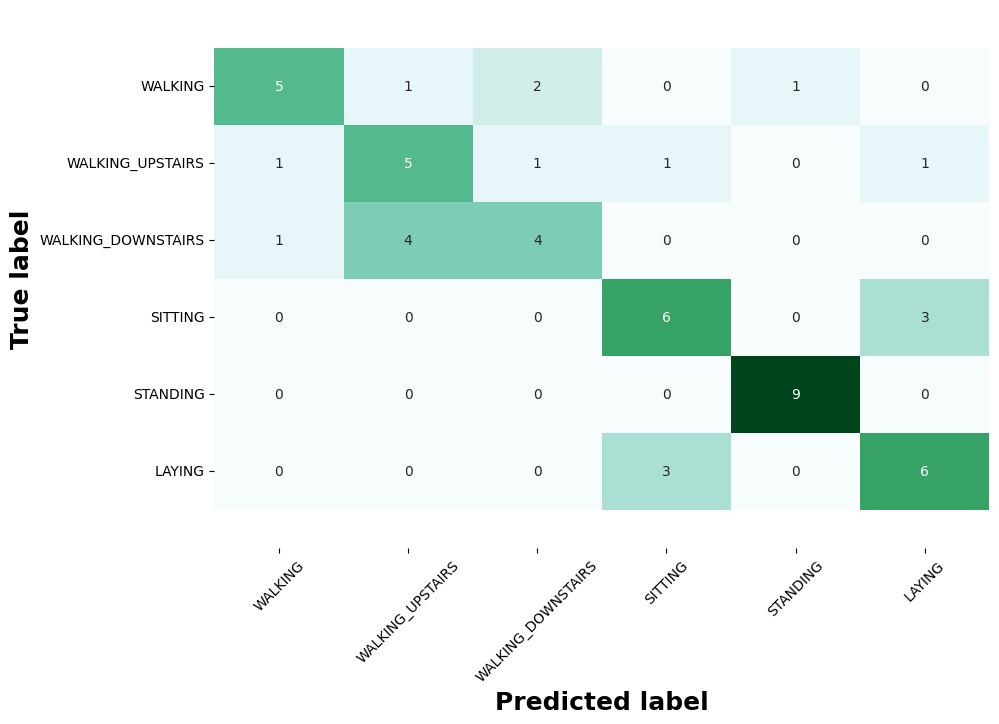

                    precision    recall  f1-score   support

           WALKING       0.71      0.56      0.62         9
  WALKING_UPSTAIRS       0.50      0.56      0.53         9
WALKING_DOWNSTAIRS       0.57      0.44      0.50         9
           SITTING       0.60      0.67      0.63         9
          STANDING       0.90      1.00      0.95         9
            LAYING       0.60      0.67      0.63         9

          accuracy                           0.65        54
         macro avg       0.65      0.65      0.64        54
      weighted avg       0.65      0.65      0.64        54



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

X_test = np.sqrt(np.sum(X_test**2, axis=2))

# Predict on the test set
y_test_predict = clf.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_test_predict)
precision = precision_score(y_test, y_test_predict, average='weighted')
recall = recall_score(y_test, y_test_predict, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_predict)

# Define activity labels (based on UCI HAR dataset activities)
activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Create a DataFrame for confusion matrix for better visualization
df_cm = pd.DataFrame(cm, index=activity_labels, columns=activity_labels)

plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_cm, cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel("True label", fontweight="bold", fontsize=18)
plt.xlabel("Predicted label", fontweight="bold", fontsize=18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)  # Correct visual adjustment
plt.show()

# Detailed Classification Report
print(classification_report(y_test, y_test_predict, target_names=activity_labels))


# Train a decision tree model using the features obtained by TSFEL. 

(126, 495) (126,) (54, 495) (54,)
Accuracy: 0.9074
Precision: 0.9129
Recall: 0.9074


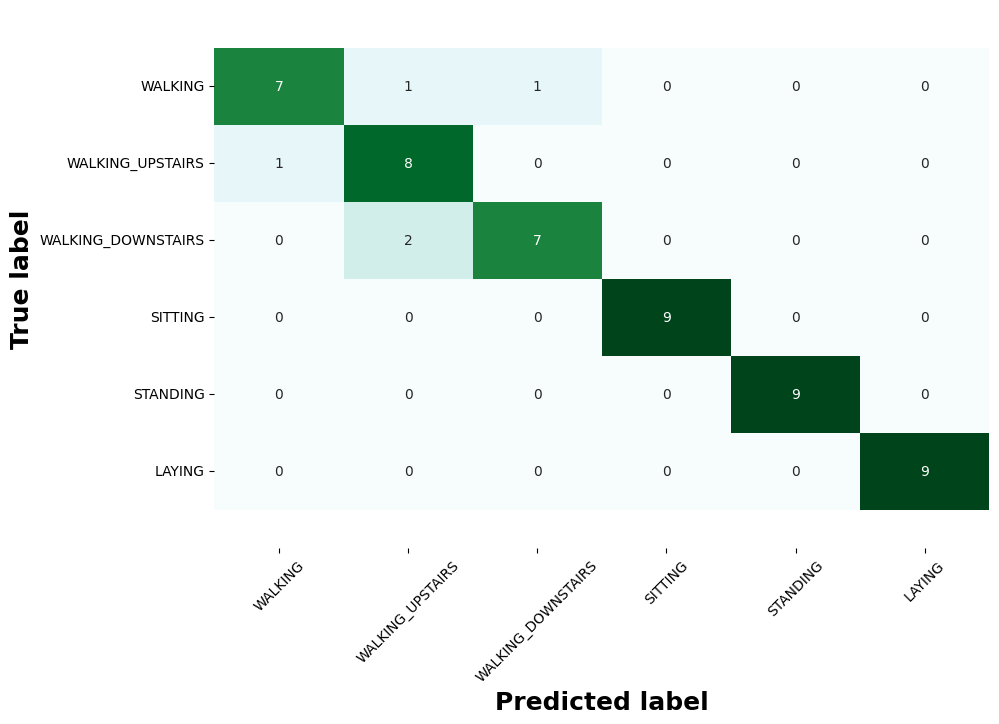

                    precision    recall  f1-score   support

           WALKING       0.88      0.78      0.82         9
  WALKING_UPSTAIRS       0.73      0.89      0.80         9
WALKING_DOWNSTAIRS       0.88      0.78      0.82         9
           SITTING       1.00      1.00      1.00         9
          STANDING       1.00      1.00      1.00         9
            LAYING       1.00      1.00      1.00         9

          accuracy                           0.91        54
         macro avg       0.91      0.91      0.91        54
      weighted avg       0.91      0.91      0.91        54



In [16]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load feature data assuming 'activity' was the last column before removing
train_data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\features_train.csv')
test_data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\features_test.csv')

# Extract the target labels (activity) and remove from feature data
y_train_features = train_data['activity']
y_test_features = test_data['activity']

X_train_features = train_data.drop(columns=['activity'])
X_test_features = test_data.drop(columns=['activity'])

print(X_train_features.shape, y_train_features.shape, X_test_features.shape, y_test_features.shape)

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train_features, y_train_features)

# Predict on the test set
y_test_predict = clf.predict(X_test_features)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test_features, y_test_predict)
precision = precision_score(y_test_features, y_test_predict, average='weighted')
recall = recall_score(y_test_features, y_test_predict, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_features, y_test_predict)

# Define activity labels (based on UCI HAR dataset activities)
activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# DataFrame for confusion matrix for better visualization
df_cm = pd.DataFrame(cm, index=activity_labels, columns=activity_labels)

plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_cm, cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel("True label", fontweight="bold", fontsize=18)
plt.xlabel("Predicted label", fontweight="bold", fontsize=18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 
plt.show()

print(classification_report(y_test_features, y_test_predict, target_names=activity_labels))


C:\Users\HP\AppData\Local\Temp\ipykernel_17024\3864670514.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None, engine='python')
C:\Users\HP\AppData\Local\Temp\ipykernel_17024\3864670514.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\test\X_test.txt', delim_whitespace=True, header=None, engine='python')


Test Accuracy: 0.86
Test Precision: 0.86
Test Recall: 0.86


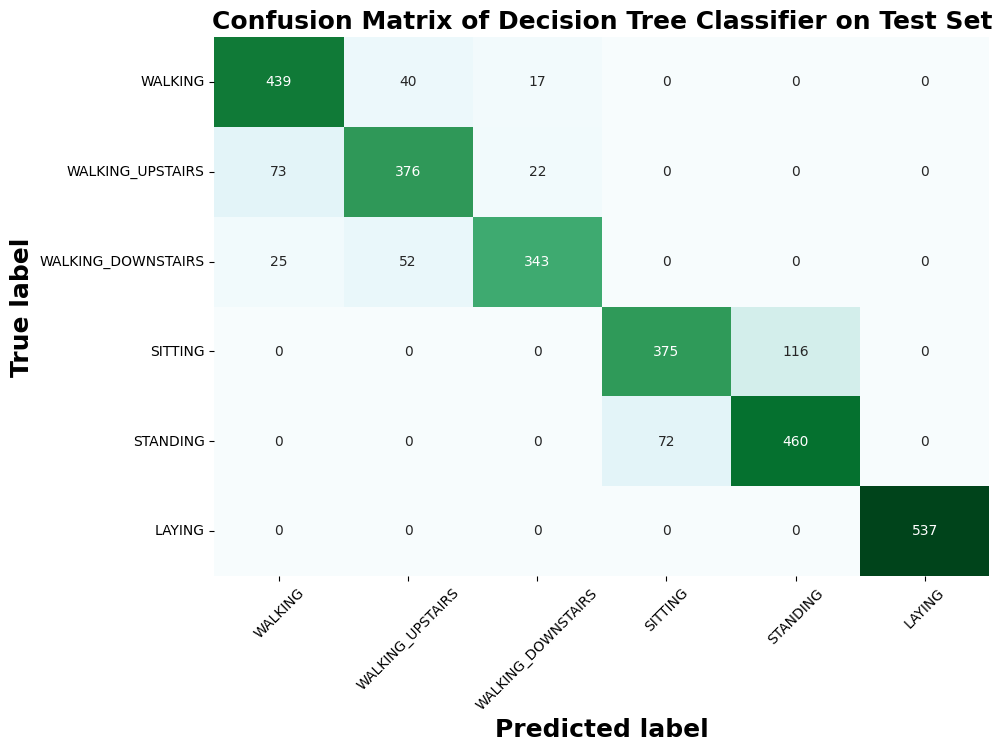

                    precision    recall  f1-score   support

           WALKING       0.82      0.89      0.85       496
  WALKING_UPSTAIRS       0.80      0.80      0.80       471
WALKING_DOWNSTAIRS       0.90      0.82      0.86       420
           SITTING       0.84      0.76      0.80       491
          STANDING       0.80      0.86      0.83       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.86      0.85      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define activity labels
activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Step 1: Load the Training Data
X_train = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None, engine='python')
y_train = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\train\y_train.txt', header=None)
y_train = y_train.values.flatten()

# Load the Test Data
X_test = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\test\X_test.txt', delim_whitespace=True, header=None, engine='python')
y_test = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\test\y_test.txt', header=None)
y_test = y_test.values.flatten()

# Preprocessing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree Model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)

# Make Predictions on the Test Set
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the Model on the Test Set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")

df_cm = pd.DataFrame(test_conf_matrix, index=activity_labels, columns=activity_labels)

plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_cm, cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel("True label", fontweight="bold", fontsize=18)
plt.xlabel("Predicted label", fontweight="bold", fontsize=18)
plt.title('Confusion Matrix of Decision Tree Classifier on Test Set', fontsize=18, fontweight='bold')
plt.show()

print(classification_report(y_test, y_test_pred, target_names=activity_labels))


In [11]:
X_test.shape

(2947, 561)

Compare the results of the three models. Which model do you think is better?

Accuracy: Model 2 (0.8889) outperforms Model 3 (0.86) and Model 1 (0.6481).
Metrics: Model 2 leads in precision, recall, and F1-score. Model 3 is good but slightly behind. Model 1 is the weakest.
Class Performance: Model 2 excels across all classes, especially SITTING, STANDING, and LAYING. Model 3 is balanced but not as strong as Model 2. Model 1 is least effective.
Conclusion: Model 2 is the best overall. Model 3 is a strong second, while Model 1 needs improvement.

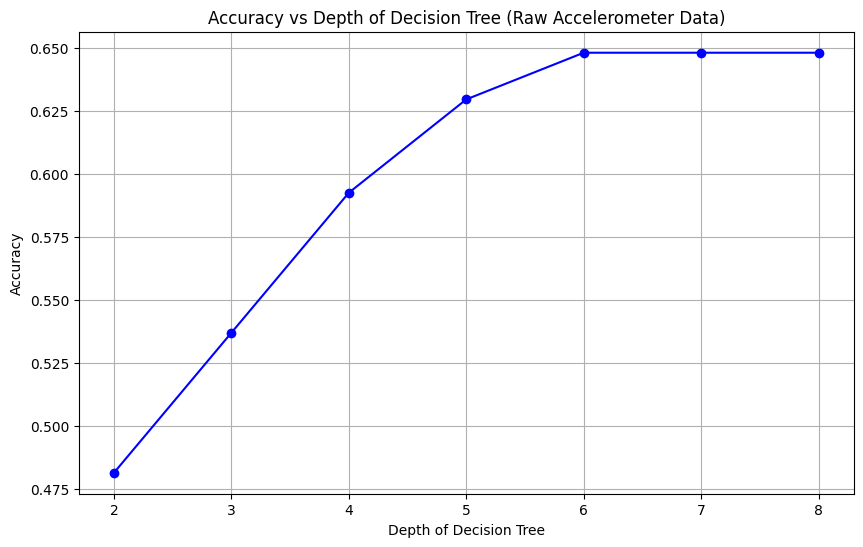

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import CombineScript
import MakeDataset
from MakeDataset import *



X_train = np.sqrt(np.sum(X_train**2, axis=2))
X_test = np.sqrt(np.sum(X_test**2, axis=2))

depths = range(2, 9)
accuracies = []

# Train and evaluate Decision Tree models with varying depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_test_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_predict)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree (Raw Accelerometer Data)')
plt.grid(True)
plt.show()


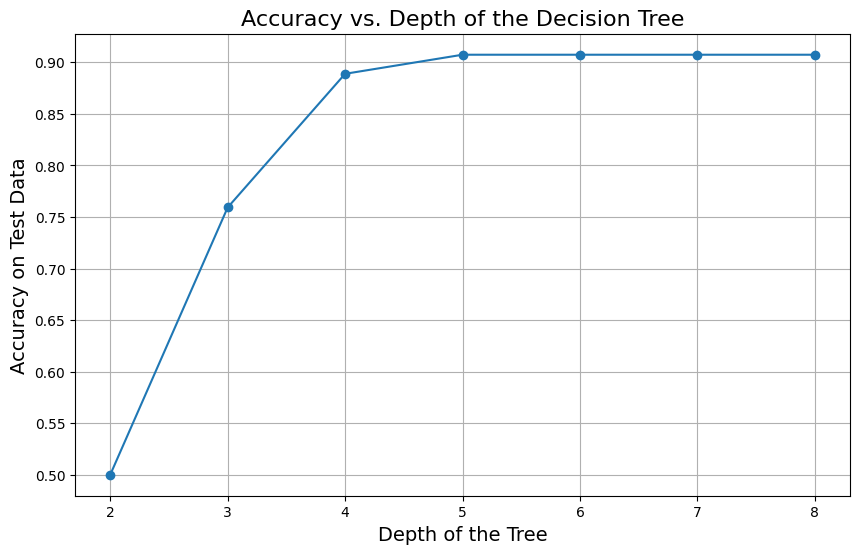

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\features_train.csv')
test_data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\features_test.csv')


y_train_features = train_data['activity']
y_test_features = test_data['activity']

X_train_features = train_data.drop(columns=['activity'])
X_test_features = test_data.drop(columns=['activity'])


depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_features, y_train_features)
    y_test_predict = clf.predict(X_test_features)
    
    
    accuracy = accuracy_score(y_test_features, y_test_predict)
    accuracies.append(accuracy)
    
    #print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Depth of the Tree', fontsize=14)
plt.ylabel('Accuracy on Test Data', fontsize=14)
plt.title('Accuracy vs. Depth of the Decision Tree', fontsize=16)
plt.grid(True)
plt.xticks(depths)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17024\1602120802.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None, engine='python')
C:\Users\HP\AppData\Local\Temp\ipykernel_17024\1602120802.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\test\X_test.txt', delim_whitespace=True, header=None, engine='python')


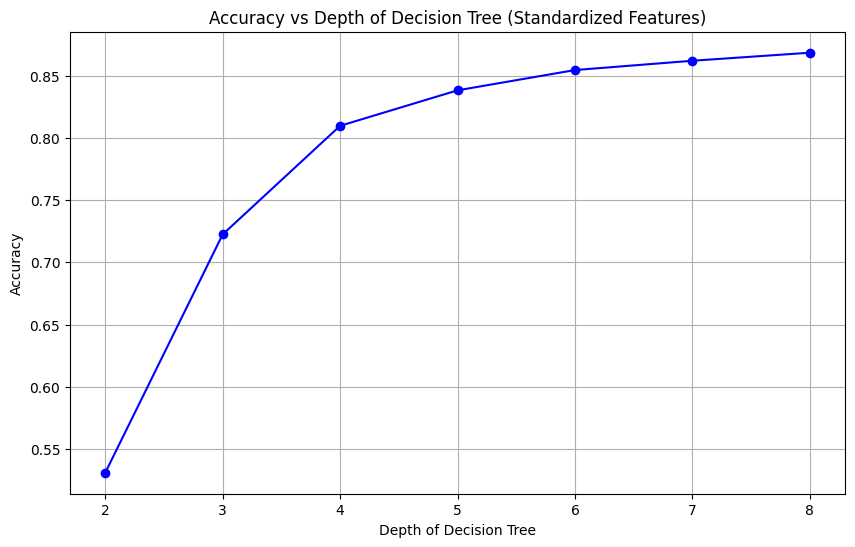

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X_train = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None, engine='python')
y_train = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\train\y_train.txt', header=None)
X_test = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\test\X_test.txt', delim_whitespace=True, header=None, engine='python')
y_test = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ML-assignment-1\HAR\UCI HAR Dataset\test\y_test.txt', header=None)

# Convert y_train and y_test to NumPy arrays and flatten
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_test_predict = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_predict)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree (Standardized Features)')
plt.grid(True)
plt.show()


Poor Performance Analysis:

Model 1: Struggles with WALKING_DOWNSTAIRS due to feature overlap or insufficient data; performs well for STANDING.
Model 2: Generally strong, but WALKING has lower recall; good at SITTING, STANDING, and LAYING.
Model 3: High recall but lower precision for WALKING; SITTING performance is lower due to potential feature confusion.
Reasons:

Feature Overlap: Similar features between activities.
Insufficient Data: Limited examples affect performance.
Class Imbalance: Less frequent activities are poorly predicted.
Model Complexity: Simpler models may miss complex patterns.
Feature Engineering: Inadequate features for distinguishing activities.